# Customer Churn Prediction for Vodafone (Germany)



### About the data set:

The data set contains customer data for a popular Telecom service provider brand (Vodafone) in Germany.

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.dummy import DummyClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, plot_confusion_matrix 

%matplotlib inline

In [2]:
# defining file path
file_path = "C:/Users/spand/Desktop/MMA Academic MBS-IDC/MINI SEM 3 (Mar - Apr)/Data Science For Business 2/assignment/assignment 2/Churn.csv"

#read the csv file and store into a DataFrame
given_data = pd.read_csv(file_path)

In [3]:
# we view the dataframe to identify the categorical and numerical features
given_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# checking shape of training data
given_data.shape

(7043, 21)

In [5]:
# view the dataframe description & data types
given_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# viewing the names of the given columns
given_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
#finding unique items in customerID column
print('The unique Customer IDs are: \n', given_data.customerID.unique(), '\n')

#finding the number of unique items in salary column
print('The number of unique Customer IDs are: ', len(given_data.customerID.unique()))

The unique Customer IDs are: 
 ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] 

The number of unique Customer IDs are:  7043


In [8]:
#finding unique items in gender column
print('The unique gender are: \n', given_data.gender.unique(), '\n')

#finding the number of unique items in salary column
print('The number of unique gender are: ', len(given_data.gender.unique()))

The unique gender are: 
 ['Female' 'Male'] 

The number of unique gender are:  2


In [9]:
#finding unique items in SeniorCitizen column
print('The unique SeniorCitizen are: \n', given_data.SeniorCitizen.unique(), '\n')

#finding the number of unique items in salary column
print('The number of unique SeniorCitizen are: ', len(given_data.SeniorCitizen.unique()))

The unique SeniorCitizen are: 
 [0 1] 

The number of unique SeniorCitizen are:  2


In [10]:
#finding unique items in Partner column
print('The unique Partner are: \n', given_data.Partner.unique(), '\n')

#finding the number of unique items in salary column
print('The number of unique Partner are: ', len(given_data.Partner.unique()))

The unique Partner are: 
 ['Yes' 'No'] 

The number of unique Partner are:  2


In [11]:
#finding unique items in Dependents column
print('The unique Dependents are: \n', given_data.Dependents.unique(), '\n')

#finding the number of unique items in salary column
print('The number of unique Dependents are: ', len(given_data.Dependents.unique()))

The unique Dependents are: 
 ['No' 'Yes'] 

The number of unique Dependents are:  2


In [12]:
#finding unique items in PhoneService column
print('The unique PhoneService are: \n', given_data.PhoneService.unique(), '\n')

#finding the number of unique items in PhoneService column
print('The number of unique PhoneService are: ', len(given_data.PhoneService.unique()))

The unique PhoneService are: 
 ['No' 'Yes'] 

The number of unique PhoneService are:  2


In [13]:
#finding unique items in MultipleLines column
print('The unique MultipleLines are: \n', given_data.MultipleLines.unique(), '\n')

#finding the number of unique items in MultipleLines column
print('The number of unique MultipleLines are: ', len(given_data.MultipleLines.unique()))

The unique MultipleLines are: 
 ['No phone service' 'No' 'Yes'] 

The number of unique MultipleLines are:  3


In [14]:
#finding unique items in InternetService column
print('The unique InternetService are: \n', given_data.InternetService.unique(), '\n')

#finding the number of unique items in InternetService column
print('The number of unique InternetService are: ', len(given_data.InternetService.unique()))

The unique InternetService are: 
 ['DSL' 'Fiber optic' 'No'] 

The number of unique InternetService are:  3


In [15]:
#finding unique items in OnlineSecurity column
print('The unique OnlineSecurity are: \n', given_data.OnlineSecurity.unique(), '\n')

#finding the number of unique items in OnlineSecurity column
print('The number of unique OnlineSecurity are: ', len(given_data.OnlineSecurity.unique()))

The unique OnlineSecurity are: 
 ['No' 'Yes' 'No internet service'] 

The number of unique OnlineSecurity are:  3


In [16]:
#finding unique items in OnlineBackup column
print('The unique OnlineBackup are: \n', given_data.OnlineBackup.unique(), '\n')

#finding the number of unique items in OnlineBackup column
print('The number of unique OnlineBackup are: ', len(given_data.OnlineBackup.unique()))

The unique OnlineBackup are: 
 ['Yes' 'No' 'No internet service'] 

The number of unique OnlineBackup are:  3


In [17]:
#finding unique items in DeviceProtection column
print('The unique DeviceProtection are: \n', given_data.DeviceProtection.unique(), '\n')

#finding the number of unique items in DeviceProtection column
print('The number of unique DeviceProtection are: ', len(given_data.DeviceProtection.unique()))

The unique DeviceProtection are: 
 ['No' 'Yes' 'No internet service'] 

The number of unique DeviceProtection are:  3


In [18]:
#finding unique items in TechSupport column
print('The unique TechSupport are: \n', given_data.TechSupport.unique(), '\n')

#finding the number of unique items in TechSupport column
print('The number of unique TechSupport are: ', len(given_data.TechSupport.unique()))

The unique TechSupport are: 
 ['No' 'Yes' 'No internet service'] 

The number of unique TechSupport are:  3


In [19]:
#finding unique items in StreamingTV column
print('The unique StreamingTV are: \n', given_data.StreamingTV.unique(), '\n')

#finding the number of unique items in StreamingTV column
print('The number of unique StreamingTV are: ', len(given_data.StreamingTV.unique()))

The unique StreamingTV are: 
 ['No' 'Yes' 'No internet service'] 

The number of unique StreamingTV are:  3


In [20]:
#finding unique items in StreamingMovies column
print('The unique StreamingMovies are: \n', given_data.StreamingMovies.unique(), '\n')

#finding the number of unique items in StreamingMovies column
print('The number of unique StreamingMovies are: ', len(given_data.StreamingMovies.unique()))

The unique StreamingMovies are: 
 ['No' 'Yes' 'No internet service'] 

The number of unique StreamingMovies are:  3


In [21]:
#finding unique items in Contract column
print('The unique Contract are: \n', given_data.Contract.unique(), '\n')

#finding the number of unique items in Contract column
print('The number of unique Contract are: ', len(given_data.Contract.unique()))

The unique Contract are: 
 ['Month-to-month' 'One year' 'Two year'] 

The number of unique Contract are:  3


In [22]:
#finding unique items in PaperlessBilling column
print('The unique PaperlessBilling are: \n', given_data.PaperlessBilling.unique(), '\n')

#finding the number of unique items in PaperlessBilling column
print('The number of unique PaperlessBilling are: ', len(given_data.PaperlessBilling.unique()))

The unique PaperlessBilling are: 
 ['Yes' 'No'] 

The number of unique PaperlessBilling are:  2


In [23]:
#finding unique items in PaymentMethod column
print('The unique PaymentMethod are: \n', given_data.PaymentMethod.unique(), '\n')

#finding the number of unique items in PaymentMethod column
print('The number of unique PaymentMethod are: ', len(given_data.PaymentMethod.unique()))

The unique PaymentMethod are: 
 ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 

The number of unique PaymentMethod are:  4


In [24]:
#finding unique items in Churn column
print('The unique Churn are: \n', given_data.Churn.unique(), '\n')

#finding the number of unique items in Churn column
print('The number of unique Churn are: ', len(given_data.Churn.unique()))

The unique Churn are: 
 ['No' 'Yes'] 

The number of unique Churn are:  2


In [25]:
#finding unique items in MonthlyCharges column
print('The unique MonthlyCharges are: \n', given_data.MonthlyCharges.unique(), '\n')

#finding the number of unique items in MonthlyCharges column
print('The number of unique MonthlyCharges are: ', len(given_data.MonthlyCharges.unique()))

The unique MonthlyCharges are: 
 [29.85 56.95 53.85 ... 63.1  44.2  78.7 ] 

The number of unique MonthlyCharges are:  1585


In [26]:
#finding unique items in TotalCharges column
print('The unique TotalCharges are: \n', given_data.TotalCharges.unique(), '\n')

#finding the number of unique items in TotalCharges column
print('The number of unique TotalCharges are: ', len(given_data.TotalCharges.unique()))

The unique TotalCharges are: 
 ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5'] 

The number of unique TotalCharges are:  6531


In [27]:
given_data.TotalCharges = pd.to_numeric(given_data.TotalCharges, errors='coerce')

In [28]:
non_cat_data = pd.DataFrame(given_data, columns=['customerID','SeniorCitizen','tenure','MonthlyCharges','TotalCharges'])

In [29]:
non_cat_data.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,1,29.85,29.85
1,5575-GNVDE,0,34,56.95,1889.50
2,3668-QPYBK,0,2,53.85,108.15
3,7795-CFOCW,0,45,42.30,1840.75
4,9237-HQITU,0,2,70.70,151.65


In [30]:
non_cat_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [31]:
given_data.drop(labels = ['customerID','SeniorCitizen','tenure','MonthlyCharges','TotalCharges'], inplace=True, axis=1)

In [32]:
given_data.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [33]:
cat_data = given_data

In [34]:
cat_data = pd.get_dummies(cat_data, drop_first = True)

In [35]:
cat_data.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,1,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,1
3,1,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1


In [36]:
total_data = pd.concat([cat_data, non_cat_data], axis=1)

In [37]:
total_data.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,0,0,1,0,0,0,0,0,...,1,0,1,0,0,7590-VHVEG,0,1,29.85,29.85
1,1,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,5575-GNVDE,0,34,56.95,1889.50
2,1,0,0,1,0,0,0,0,0,1,...,1,0,0,1,1,3668-QPYBK,0,2,53.85,108.15
3,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,7795-CFOCW,0,45,42.30,1840.75
4,0,0,0,1,0,0,1,0,0,0,...,1,0,1,0,1,9237-HQITU,0,2,70.70,151.65


In [38]:
train = total_data.copy()

In [39]:
train['factored_customerID'] = pd.factorize(train['customerID'])[0]

In [40]:
train.drop(labels = 'customerID', inplace=True, axis=1)

In [41]:
train.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,factored_customerID
0,0,1,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,1,29.85,29.85,0
1,1,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,34,56.95,1889.50,1
2,1,0,0,1,0,0,0,0,0,1,...,1,0,0,1,1,0,2,53.85,108.15,2
3,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,45,42.30,1840.75,3
4,0,0,0,1,0,0,1,0,0,0,...,1,0,1,0,1,0,2,70.70,151.65,4


In [42]:
# customer id map
custID_map = pd.concat([total_data['customerID'], train['factored_customerID']], axis=1)

In [43]:
custID_map.head()

,customerID,factored_customerID
0,7590-VHVEG,0
1,5575-GNVDE,1
2,3668-QPYBK,2
3,7795-CFOCW,3
4,9237-HQITU,4


### Visualizing relations

In [44]:
train.corr()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,factored_customerID
gender_Male,1.000000,-0.001808,0.010517,-0.006488,0.006488,-0.008414,-0.011286,0.006026,0.006026,-0.017021,...,-0.011754,0.001215,0.000752,0.013744,-0.008612,-0.001874,0.005106,-0.014569,0.000048,-0.008192
Partner_Yes,-0.001808,1.000000,0.452676,0.017706,-0.017706,0.142057,0.000304,0.000615,0.000615,0.143106,...,-0.014877,0.082029,-0.083852,-0.095125,-0.150448,0.016479,0.379697,0.096848,0.319072,-0.000189
Dependents_Yes,0.010517,0.452676,1.000000,-0.001762,0.001762,-0.024526,-0.165818,0.139812,0.139812,0.080972,...,-0.111377,0.060267,-0.150642,0.059071,-0.164221,-0.211185,0.159712,-0.113890,0.064653,-0.005171
PhoneService_Yes,-0.006488,0.017706,-0.001762,1.000000,-1.000000,0.279690,0.289999,0.172209,0.172209,-0.092893,...,0.016505,-0.007721,0.003062,-0.003319,0.011942,0.008576,0.008448,0.247398,0.113008,-0.027049
MultipleLines_No phone service,0.006488,-0.017706,0.001762,-1.000000,1.000000,-0.279690,-0.289999,-0.172209,-0.172209,0.092893,...,-0.016505,0.007721,-0.003062,0.003319,-0.011942,-0.008576,-0.008448,-0.247398,-0.113008,0.027049
MultipleLines_Yes,-0.008414,0.142057,-0.024526,0.279690,-0.279690,1.000000,0.366083,-0.210564,-0.210564,0.098108,...,0.163530,0.060048,0.083618,-0.227206,0.040102,0.142948,0.331941,0.490434,0.469042,-0.013852
InternetService_Fiber optic,-0.011286,0.000304,-0.165818,0.289999,-0.289999,0.366083,1.000000,-0.465793,-0.465793,-0.030696,...,0.326853,-0.050077,0.336410,-0.306834,0.308020,0.255338,0.019720,0.787066,0.360769,-0.009715
InternetService_No,0.006026,0.000615,0.139812,0.172209,-0.172209,-0.210564,-0.465793,1.000000,1.000000,-0.333403,...,-0.321013,0.001030,-0.284917,0.321361,-0.227890,-0.182742,-0.039062,-0.763557,-0.374878,-0.001153
OnlineSecurity_No internet service,0.006026,0.000615,0.139812,0.172209,-0.172209,-0.210564,-0.465793,1.000000,1.000000,-0.333403,...,-0.321013,0.001030,-0.284917,0.321361,-0.227890,-0.182742,-0.039062,-0.763557,-0.374878,-0.001153
OnlineSecurity_Yes,-0.017021,0.143106,0.080972,-0.092893,0.092893,0.098108,-0.030696,-0.333403,-0.333403,1.000000,...,-0.003636,0.115721,-0.112338,-0.080798,-0.171226,-0.038653,0.327203,0.296594,0.412619,-0.001134


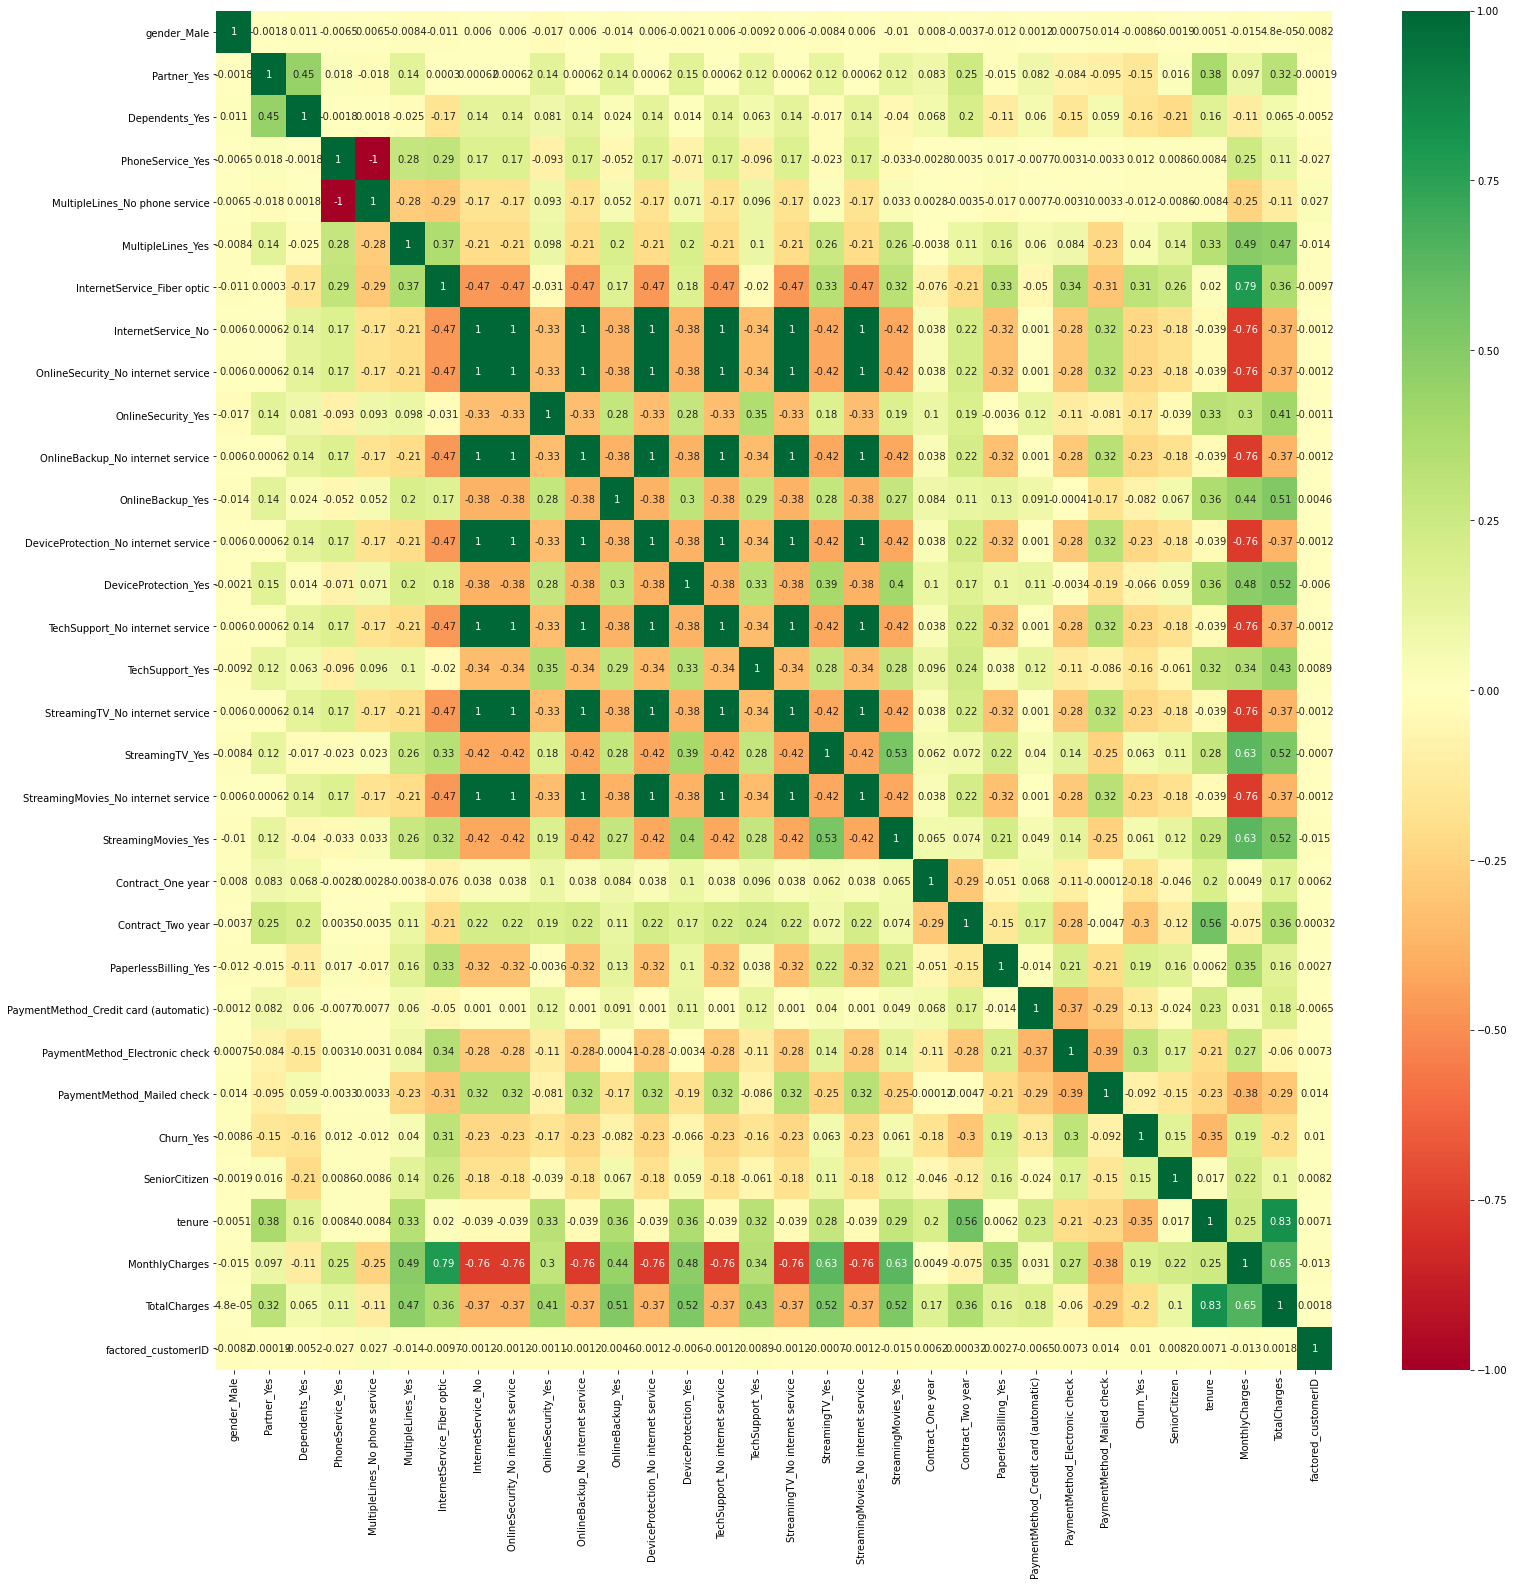

In [45]:
# Heat map for the feature correlations
%matplotlib inline
corr_matrix = train.corr()
top_corr_features = corr_matrix.index
plt.figure(figsize=(25,25))
g=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

<AxesSubplot:>

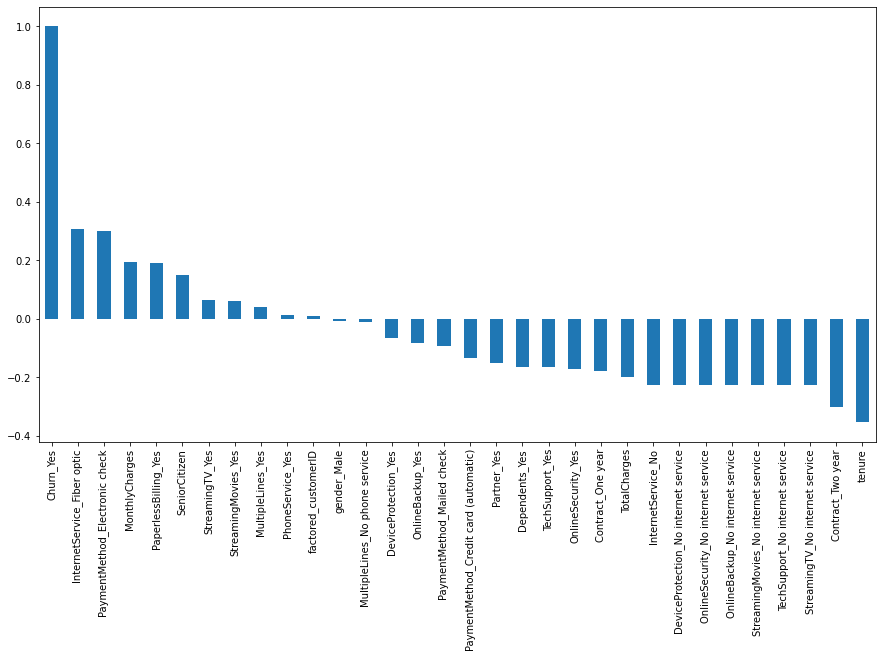

In [46]:
#Get Correlation of "Churn_Yes" with other variables:
plt.figure(figsize=(15,8))
train.corr()['Churn_Yes'].sort_values(ascending = False).plot(kind='bar')

In [47]:
corr_variables = pd.concat([train['InternetService_No'], train['OnlineSecurity_No internet service'],train['OnlineBackup_No internet service'], train['TechSupport_No internet service'],train['StreamingTV_No internet service'], train['StreamingMovies_No internet service'], train['DeviceProtection_No internet service']], axis=1)

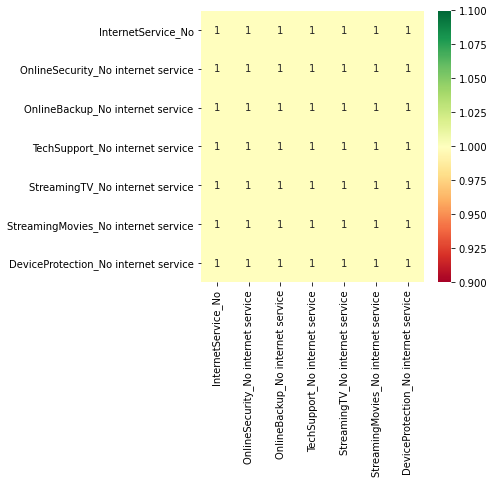

In [48]:
# Heat map for the feature correlations
%matplotlib inline
corr_matrix = corr_variables.corr()
top_corr_features = corr_matrix.index
plt.figure(figsize=(5,5))
g=sns.heatmap(corr_variables[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [49]:
train.drop(labels = ['OnlineSecurity_No internet service','OnlineBackup_No internet service','TechSupport_No internet service','StreamingTV_No internet service','StreamingMovies_No internet service','DeviceProtection_No internet service'], inplace=True, axis=1)

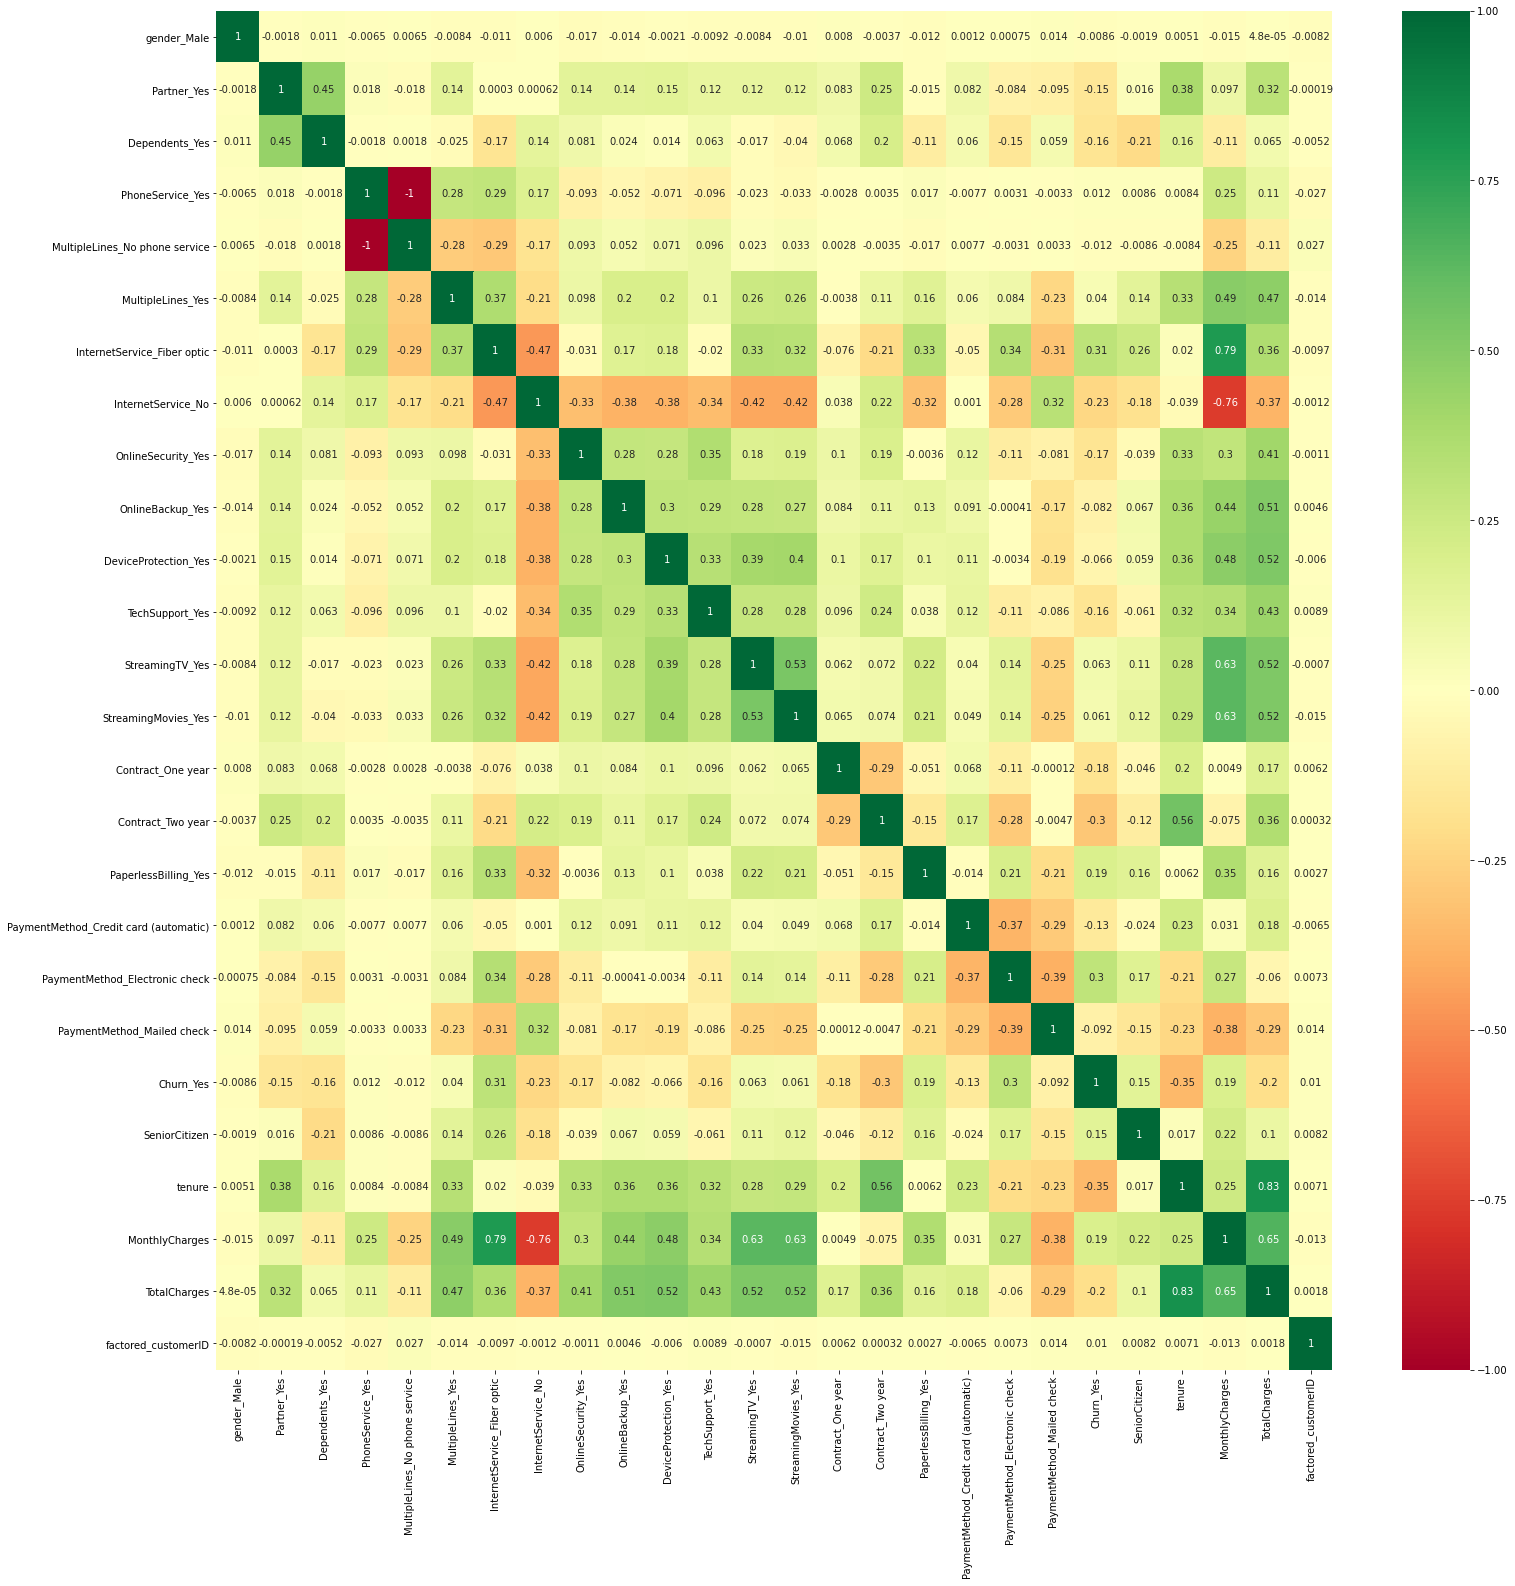

In [50]:
# Heat map for the feature correlations
%matplotlib inline
corr_matrix = train.corr()
top_corr_features = corr_matrix.index
plt.figure(figsize=(25,25))
g=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [51]:
y = pd.DataFrame(train, columns=['Churn_Yes'])

In [52]:
y.head()

,Churn_Yes
0,0
1,0
2,1
3,0
4,1


In [53]:
train.drop(labels = 'Churn_Yes', inplace=True, axis=1)

In [54]:
X = train.copy()

In [55]:
X.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,factored_customerID
0,0,1,0,0,1,0,0,0,0,1,...,0,1,0,1,0,0,1,29.85,29.85,0
1,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,34,56.95,1889.50,1
2,1,0,0,1,0,0,0,0,1,1,...,0,1,0,0,1,0,2,53.85,108.15,2
3,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,45,42.30,1840.75,3
4,0,0,0,1,0,0,1,0,0,0,...,0,1,0,1,0,0,2,70.70,151.65,4


In [68]:
total_cust = 7043
churn_count = 0
for i in y['Churn_Yes']:
    if i == 1:
        churn_count += 1
print('The number of churning customers are: {}'.format(churn_count))
print('Total customers are: ', total_cust)
print('Number of loyal customers are:', (total_cust - churn_count))
print('Churn Rate is: {:.2f} %'.format((churn_count/total_cust)*100))

The number of churning customers are: 1869
Total customers are:  7043
Number of loyal customers are: 5174
Churn Rate is: 26.54 %


In [70]:
# making the split with 80% training data & 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# viewing the shape of the train & test data
print(f"Shape of Training Data: {X_train.shape}, {y_train.shape}")
print(f"Shape of Test Data: {X_test.shape}, {y_test.shape}")

Shape of Training Data: (5634, 25), (5634, 1)
Shape of Test Data: (1409, 25), (1409, 1)


In [71]:
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
y_dummy_preds = dummy_majority.predict(X_test)
dummy_majority.score(X_test, y_test)

0.7352732434350603

In [75]:
X_train = np.nan_to_num(X_train)

In [76]:
upsample = SMOTE()
X_up_train, y_up_train = upsample.fit_resample(X_train, y_train)

In [77]:
# counting samples per class after Upsampling
print(f"Shape of Training Data (after Upsampling): {X_up_train.shape}, {y_up_train.shape}")
print(f"Shape of Test Data: {X_test.shape}, {y_test.shape}")

Shape of Training Data (after Upsampling): (8276, 25), (8276, 1)
Shape of Test Data: (1409, 25), (1409, 1)


In [78]:
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_up_train, y_up_train)
y_dummy_preds = dummy_majority.predict(X_test)
dummy_majority.score(X_test, y_test)

0.7352732434350603

In [79]:
# Creating dictionary containing all classification models

all_models = {
    "Random_Forest_model":RandomForestClassifier(random_state= 0),
    "KNN_model":KNeighborsClassifier(),
    "Logistic_Regression_model":LogisticRegression(random_state= 0),
    "Gaussian_Naive_Bayes_model":GaussianNB(),
    "SVM_Linear_model":LinearSVC(),
    "SVM_RBF_model":svm.SVC(kernel='rbf'),
    "SVM_Poly_model":svm.SVC(kernel='poly'),
    "XGBoost_model":XGBClassifier()
    }

In [80]:
# initializing a dictionary for recording & summarizing the mean cross validation score for all models

cross_val_summary = {
    "Random_Forest_model":0,
    "KNN_model":0,
    "Logistic_Regression_model":0,
    "Gaussian_Naive_Bayes_model":0,
    "SVM_Linear_model":0,
    "SVM_RBF_model":0,
    "SVM_Poly_model":0,
    "XGBoost_model":0
    }

In [81]:
# initializing a dictionary for storing the trained model pipeline for all models (before hyperparameter tuning)

trained_model = {
    "Random_Forest_model":0,
    "KNN_model":0,
    "Logistic_Regression_model":0,
    "Gaussian_Naive_Bayes_model":0,
    "SVM_Linear_model":0,
    "SVM_RBF_model":0,
    "SVM_Poly_model":0,
    "XGBoost_model":0
    }

In [82]:
# Checking for best baseline model using Cross Validation (before hyperparameter tuning)

for model_name in all_models:
    print(f"Model Name: {model_name}")
    pipe = make_pipeline(StandardScaler(), all_models[model_name]).fit(X_up_train, y_up_train)
    trained_model[model_name] = pipe
    cv_scores = cross_val_score(pipe,X_up_train, y_up_train, cv = 5)
    print('Cross-validation scores (5-fold): \n',cv_scores)
    print('Mean cross-validation score (5-fold): {}'.format(np.mean(cv_scores)))
    cross_val_summary[model_name] = np.mean(cv_scores)
    print()

Model Name: Random_Forest_model


C:\Users\spand\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\spand\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\spand\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\spand\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

Cross-validation scores (5-fold): 
 [0.6678744  0.72809668 0.92870091 0.92870091 0.92386707]
Mean cross-validation score (5-fold): 0.8354479910095304

Model Name: KNN_model


C:\Users\spand\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\spand\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\spand\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\spand\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

Cross-validation scores (5-fold): 
 [0.75543478 0.74864048 0.8060423  0.8060423  0.81148036]
Mean cross-validation score (5-fold): 0.7855280441350321

Model Name: Logistic_Regression_model
Cross-validation scores (5-fold): 
 [0.77294686 0.75589124 0.77824773 0.76555891 0.79456193]
Mean cross-validation score (5-fold): 0.7734413357268999

Model Name: Gaussian_Naive_Bayes_model


C:\Users\spand\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\spand\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\spand\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\spand\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

Cross-validation scores (5-fold): 
 [0.74637681 0.7347432  0.8        0.76978852 0.80241692]
Mean cross-validation score (5-fold): 0.7706650904155173

Model Name: SVM_Linear_model


C:\Users\spand\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\spand\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\spand\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\spand\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\spand\anaconda3\lib\site-packages\sklearn\svm\_ba

Cross-validation scores (5-fold): 
 [0.77113527 0.75407855 0.77824773 0.76435045 0.79335347]
Mean cross-validation score (5-fold): 0.7722330954361691

Model Name: SVM_RBF_model


C:\Users\spand\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\spand\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\spand\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\spand\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

Cross-validation scores (5-fold): 
 [0.73550725 0.78308157 0.87673716 0.87190332 0.88640483]
Mean cross-validation score (5-fold): 0.8307268269188668

Model Name: SVM_Poly_model


C:\Users\spand\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\spand\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\spand\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\spand\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

Cross-validation scores (5-fold): 
 [0.77475845 0.7673716  0.83564955 0.81812689 0.84410876]
Mean cross-validation score (5-fold): 0.8080030503378722

Model Name: XGBoost_model
[22:35:10] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\spand\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\spand\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\spand\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassif

[22:35:11] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\spand\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\spand\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[22:35:11] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\spand\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\spand\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[22:35:12] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\spand\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\spand\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[22:35:13] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\spand\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\spand\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[22:35:13] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Cross-validation scores (5-fold): 
 [0.64855072 0.73353474 0.92265861 0.92084592 0.92809668]
Mean cross-validation score (5-fold): 0.8307373352598626



In [83]:
# noting down all mean cross-validation scores together in a dictionary for easy reference
print('The summary of mean Cross Validation Scores is: \n')
print(cross_val_summary)

The summary of mean Cross Validation Scores is: 

{'Random_Forest_model': 0.8354479910095304, 'KNN_model': 0.7855280441350321, 'Logistic_Regression_model': 0.7734413357268999, 'Gaussian_Naive_Bayes_model': 0.7706650904155173, 'SVM_Linear_model': 0.7722330954361691, 'SVM_RBF_model': 0.8307268269188668, 'SVM_Poly_model': 0.8080030503378722, 'XGBoost_model': 0.8307373352598626}


<BarContainer object of 8 artists>

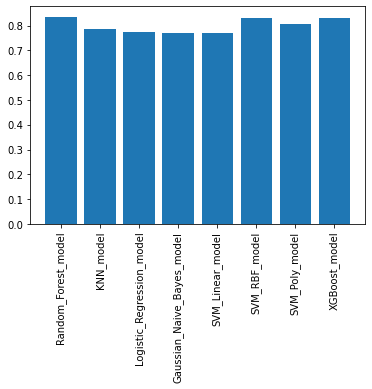

In [84]:
# plotting the mean cross validation scores for all the models for better visualization
plt.xticks(rotation=90)
plt.bar(cross_val_summary.keys(), cross_val_summary.values())

In [85]:
# initializing a dictionary for recording & summarizing the test set accuracy score for all models before hyperparameter tuning

test_score_before_tuning = {
    "Random_Forest_model":0,
    "KNN_model":0,
    "Logistic_Regression_model":0,
    "Gaussian_Naive_Bayes_model":0,
    "SVM_Linear_model":0,
    "SVM_RBF_model":0,
    "SVM_Poly_model":0,
    "XGBoost_model":0
    }

Model Name: Random_Forest_model
Accuracy: 0.7913413768630234
F1 Score: 0.7139169277178326
Precision: 0.7329030371391569
Recall: 0.7019781175277153


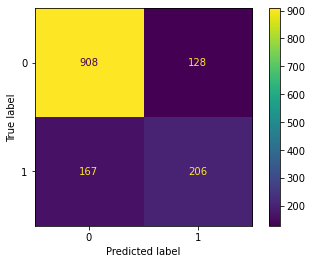


Model Name: KNN_model
Accuracy: 0.6976579134137686
F1 Score: 0.6631456663748401
Precision: 0.6624232428844079
Recall: 0.7026108356537311


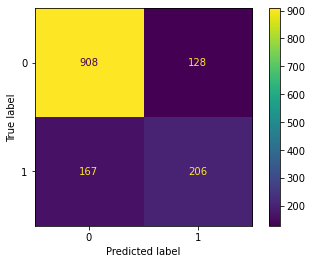


Model Name: Logistic_Regression_model
Accuracy: 0.7572746628814763
F1 Score: 0.7290165195562395
Precision: 0.7228801333699186
Recall: 0.7774656598383141


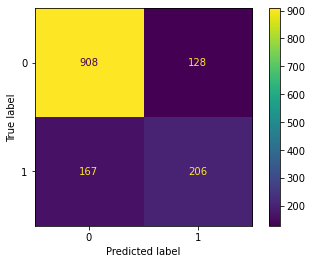


Model Name: Gaussian_Naive_Bayes_model
Accuracy: 0.7565649396735273
F1 Score: 0.7272395824220852
Precision: 0.7205512320307121
Recall: 0.7735516059912843


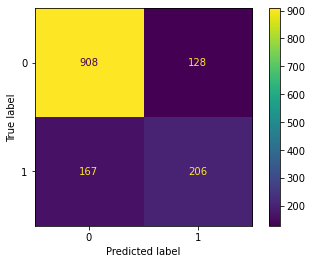


Model Name: SVM_Linear_model
Accuracy: 0.752306600425834
F1 Score: 0.7241719538182199
Precision: 0.7189266356748597
Recall: 0.7732294243688346


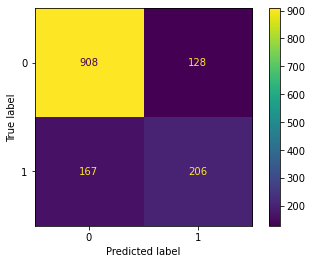


Model Name: SVM_RBF_model
Accuracy: 0.7955997161107168
F1 Score: 0.7426745129870129
Precision: 0.7383090570583726
Recall: 0.7477667249785211


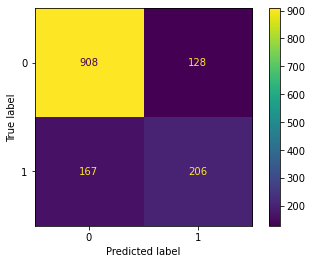


Model Name: SVM_Poly_model
Accuracy: 0.7501774308019872
F1 Score: 0.714677564846008
Precision: 0.7062919838781907
Recall: 0.7503351206434317


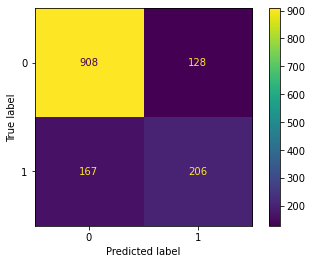


Model Name: XGBoost_model
Accuracy: 0.7906316536550745
F1 Score: 0.7214998958107897
Precision: 0.730708814928283
Recall: 0.7143633484116059


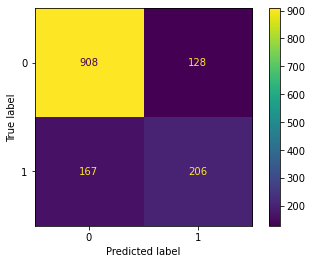

In [87]:
# all models (except for voting classifier) are implemented before hyperparameter tuning to check the performance
# the corresponding test scores are saved in the dictionary 'test_score_before_tuning' as noted above
X_test = np.nan_to_num(X_test)
for model_name in all_models:
    print(f"Model Name: {model_name}")
    predictions = trained_model[model_name].predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy: {accuracy}")
    test_score_before_tuning[model_name] = accuracy
    print(f"F1 Score: {f1_score(y_test, predictions, average='macro')}")
    print(f"Precision: {precision_score(y_test, predictions,average='macro')}")
    print(f"Recall: {recall_score(y_test, predictions,average='macro')}")
    plot_confusion_matrix(pipe, X_test, y_test)
    plt.show()
    print()

In [88]:
print('The summary of Accuracy Scores on Test Set (before hyperparameter tuning) is: \n')
print(test_score_before_tuning)

The summary of Accuracy Scores on Test Set (before hyperparameter tuning) is: 

{'Random_Forest_model': 0.7913413768630234, 'KNN_model': 0.6976579134137686, 'Logistic_Regression_model': 0.7572746628814763, 'Gaussian_Naive_Bayes_model': 0.7565649396735273, 'SVM_Linear_model': 0.752306600425834, 'SVM_RBF_model': 0.7955997161107168, 'SVM_Poly_model': 0.7501774308019872, 'XGBoost_model': 0.7906316536550745}


<BarContainer object of 8 artists>

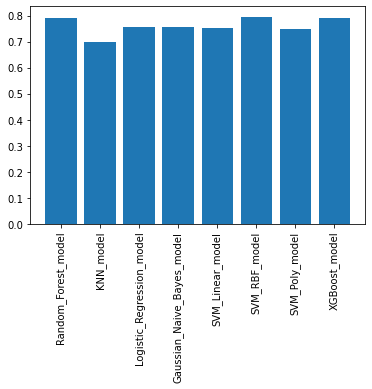

In [89]:
plt.xticks(rotation=90)
scores_before_tuning = plt.bar(test_score_before_tuning.keys(), test_score_before_tuning.values())
scores_before_tuning 

### Hyperparameter tuning

C:\Users\spand\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\spand\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\spand\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\spand\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

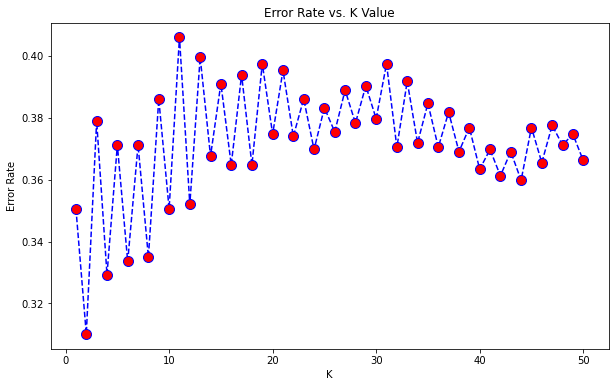

In [94]:
# KNN classifier
error_rate = []
for i in range(1, 51):
    pipeline = KNeighborsClassifier(n_neighbors = i)
    pipeline.fit(X_up_train, y_up_train)
    predictions = pipeline.predict(X_test).reshape(1409,1)
    accuracy = accuracy_score(y_test, predictions)
    #print(f"Accuracy at k = {i} is {accuracy}")
    error_rate.append(np.mean(predictions != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,51),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [95]:
# we create a dictionary of dictionaries, where the keys correspond to the model name and the values are corresponding dictionaries specifying the hyperparameters to be tuned and the values which will be checked for that model (parameter search space).

param_grids = {
    "Random_Forest_model":{'n_estimators': [100, 200],
                           'max_depth': [3,5],
                           'random_state': [10]},
    "KNN_model":{'n_neighbors' : [2,3,5],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']},
    "Logistic_Regression_model":{'random_state': [10]},
    "Gaussian_Naive_Bayes_model":{'var_smoothing': np.logspace(0,-9, num=10)},
    "SVM_Linear_model":{'max_iter': [100,1000,10000]},
    "SVM_RBF_model":{'C': [10, 100, 1000], 
              'gamma': [0.1, 0.01, 0.001],
              'kernel': ['rbf']},
    "SVM_Poly_model":{'C': [10, 100, 1000], 
              'degree': [2, 3, 4],
              'kernel': ['poly']},
    "XGBoost_model":{'max_depth': [3, 5, 7], 
                     'min_child_weight': [5,6,7]}
    }

In [91]:
# we create a dictionary of dictionaries, where the keys correspond to the model name and the values are corresponding dictionaries specifying the hyperparameters to be tuned and the values which will be checked for that model (parameter search space).

param_grids = {
    "Random_Forest_model":{'n_estimators': [100, 200],
                           'max_depth': [3,5],
                           'random_state': [10]},
    "KNN_model":{'n_neighbors' : [6,7,8],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']},
    "Logistic_Regression_model":{'random_state': [10]},
    "Gaussian_Naive_Bayes_model":{'var_smoothing': np.logspace(0,-9, num=10)},
    "SVM_Linear_model":{'max_iter': [100,1000,10000]},
    "SVM_RBF_model":{'C': [10, 100, 1000], 
              'gamma': [0.1, 0.01, 0.001],
              'kernel': ['rbf']},
    "SVM_Poly_model":{'C': [10, 100, 1000], 
              'degree': [2, 3, 4],
              'kernel': ['poly']},
    "XGBoost_model":{'max_depth': [3, 5, 7], 
                     'min_child_weight': [5,6,7]}
    }

In [97]:
# We create a dictionary for storing the models with the best parameters

tuned_model = {
    "Random_Forest_model":0,
    "KNN_model":0,
    "Logistic_Regression_model":0,
    "Gaussian_Naive_Bayes_model":0,
    "SVM_Linear_model":0,
    "SVM_RBF_model":0,
    "SVM_Poly_model":0,
    "XGBoost_model":0
    }

In [98]:
for model_name in all_models:
    print(f"Model Name: {model_name}")
    grid = GridSearchCV(all_models[model_name], param_grids[model_name], scoring='accuracy', n_jobs = -1, refit = True, verbose = 0).fit(X_up_train, y_up_train)
    print("Best Params:",grid.best_params_)
    print("Best Estimator", grid.best_estimator_)
    tuned_model[model_name]= grid.best_estimator_
    print('----------------------------------------------------------------------------')
    print()

Model Name: Random_Forest_model


C:\Users\spand\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best Params: {'max_depth': 5, 'n_estimators': 200, 'random_state': 10}
Best Estimator RandomForestClassifier(max_depth=5, n_estimators=200, random_state=10)
----------------------------------------------------------------------------

Model Name: KNN_model


C:\Users\spand\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Best Params: {'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'distance'}
Best Estimator KNeighborsClassifier(metric='manhattan', n_neighbors=2, weights='distance')
----------------------------------------------------------------------------

Model Name: Logistic_Regression_model


C:\Users\spand\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Best Params: {'random_state': 10}
Best Estimator LogisticRegression(random_state=10)
----------------------------------------------------------------------------

Model Name: Gaussian_Naive_Bayes_model


C:\Users\spand\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Best Params: {'var_smoothing': 1e-08}
Best Estimator GaussianNB(var_smoothing=1e-08)
----------------------------------------------------------------------------

Model Name: SVM_Linear_model


C:\Users\spand\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\spand\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Best Params: {'max_iter': 10000}
Best Estimator LinearSVC(max_iter=10000)
----------------------------------------------------------------------------

Model Name: SVM_RBF_model


C:\Users\spand\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Best Params: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Best Estimator SVC(C=10, gamma=0.001)
----------------------------------------------------------------------------

Model Name: SVM_Poly_model


C:\Users\spand\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Best Params: {'C': 100, 'degree': 2, 'kernel': 'poly'}
Best Estimator SVC(C=100, degree=2, kernel='poly')
----------------------------------------------------------------------------

Model Name: XGBoost_model


C:\Users\spand\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\spand\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[22:57:00] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Params: {'max_depth': 5, 'min_child_weight': 7}
Best Estimator XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=5, min_child_weight=7, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
------------------------------------------

In [99]:
print(tuned_model)

{'Random_Forest_model': RandomForestClassifier(max_depth=5, n_estimators=200, random_state=10), 'KNN_model': KNeighborsClassifier(metric='manhattan', n_neighbors=2, weights='distance'), 'Logistic_Regression_model': LogisticRegression(random_state=10), 'Gaussian_Naive_Bayes_model': GaussianNB(var_smoothing=1e-08), 'SVM_Linear_model': LinearSVC(max_iter=10000), 'SVM_RBF_model': SVC(C=10, gamma=0.001), 'SVM_Poly_model': SVC(C=100, degree=2, kernel='poly'), 'XGBoost_model': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=5, min_child_weight=7, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lamb

### perf testing on tuned model

In [100]:
# initializing a dictionary for recording & summarizing the test accuracy score for all models after hyperparameter tuning

test_score_after_tuning = {
    "Random_Forest_model":0,
    "KNN_model":0,
    "Logistic_Regression_model":0,
    "Gaussian_Naive_Bayes_model":0,
    "SVM_Linear_model":0,
    "SVM_RBF_model":0,
    "SVM_Poly_model":0,
    "XGBoost_model":0
    }

Model Name: Random_Forest_model


C:\Users\spand\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Accuracy: 0.808374733853797
F1 Score: 0.7664457366815809
Precision: 0.7560787168588404
Recall: 0.7821896963988118


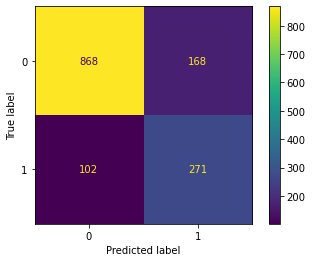

--------------------------------------------------------------------------------------

Model Name: KNN_model


C:\Users\spand\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.7374024130589071
F1 Score: 0.6720452429480889
Precision: 0.6680104165134105
Recall: 0.6773085801235935


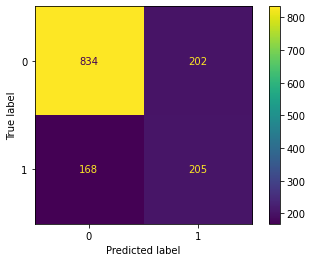

--------------------------------------------------------------------------------------

Model Name: Logistic_Regression_model
Accuracy: 0.7572746628814763
F1 Score: 0.7290165195562395
Precision: 0.7228801333699186
Recall: 0.7774656598383141


C:\Users\spand\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


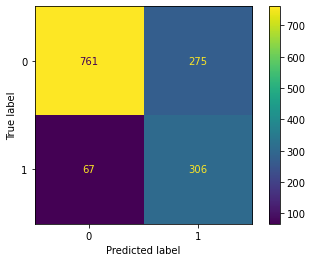

--------------------------------------------------------------------------------------

Model Name: Gaussian_Naive_Bayes_model
Accuracy: 0.7565649396735273
F1 Score: 0.7272395824220852
Precision: 0.7205512320307121
Recall: 0.7735516059912843


C:\Users\spand\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


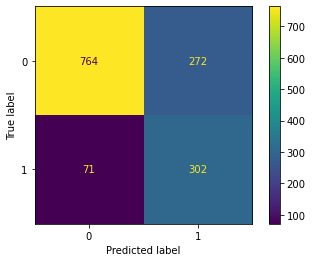

--------------------------------------------------------------------------------------

Model Name: SVM_Linear_model


C:\Users\spand\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy: 0.752306600425834
F1 Score: 0.7241719538182199
Precision: 0.7189266356748597
Recall: 0.7732294243688346


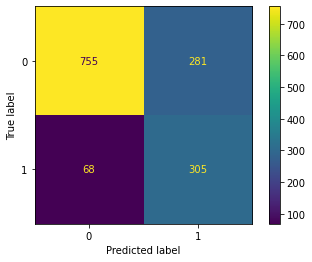

--------------------------------------------------------------------------------------

Model Name: SVM_RBF_model


C:\Users\spand\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy: 0.7508871540099361
F1 Score: 0.7217428242687829
Precision: 0.7160569443866728
Recall: 0.7688327450391794


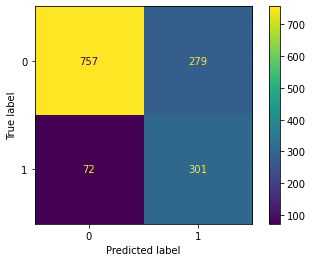

--------------------------------------------------------------------------------------

Model Name: SVM_Poly_model


C:\Users\spand\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy: 0.808374733853797
F1 Score: 0.7534567766821165
Precision: 0.7538964107837486
Recall: 0.7530225553013756


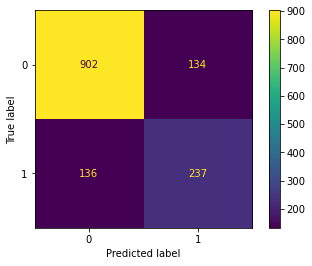

--------------------------------------------------------------------------------------

Model Name: XGBoost_model
[22:58:05] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\spand\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\spand\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy: 0.7963094393186657
F1 Score: 0.7269861009559264
Precision: 0.7388502738926749
Recall: 0.7182243522726097


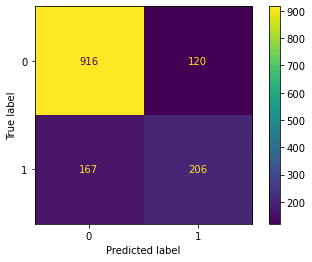

--------------------------------------------------------------------------------------



In [101]:
for model_name in tuned_model:
    print(f"Model Name: {model_name}")
    pipe = make_pipeline(StandardScaler(), tuned_model[model_name]).fit(X_up_train, y_up_train)
    predictions = pipe.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    test_score_after_tuning[model_name] = accuracy
    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1_score(y_test, predictions, average='macro')}")
    print(f"Precision: {precision_score(y_test, predictions,average='macro')}")
    print(f"Recall: {recall_score(y_test, predictions,average='macro')}")
    plot_confusion_matrix(pipe, X_test, y_test)
    plt.show()
    print('--------------------------------------------------------------------------------------')
    print()

In [102]:
print('The summary of Accuracy Scores on Test Set (after hyperparameter tuning) is: \n')
print(test_score_after_tuning)

The summary of Accuracy Scores on Test Set (after hyperparameter tuning) is: 

{'Random_Forest_model': 0.808374733853797, 'KNN_model': 0.7374024130589071, 'Logistic_Regression_model': 0.7572746628814763, 'Gaussian_Naive_Bayes_model': 0.7565649396735273, 'SVM_Linear_model': 0.752306600425834, 'SVM_RBF_model': 0.7508871540099361, 'SVM_Poly_model': 0.808374733853797, 'XGBoost_model': 0.7963094393186657}


<BarContainer object of 8 artists>

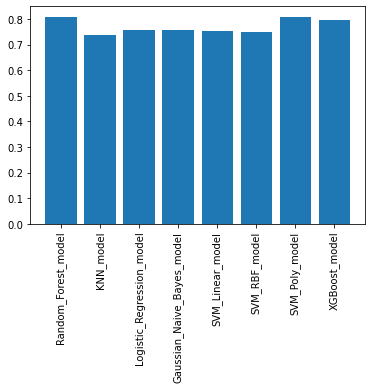

In [103]:
plt.xticks(rotation=90)
plt.bar(test_score_after_tuning.keys(), test_score_after_tuning.values())